The first five rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

The missing values for each column in the dataset:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Missing Values in Dataset:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Duplicates in Dataset:
0

All Unique Values in Target Column:
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mang

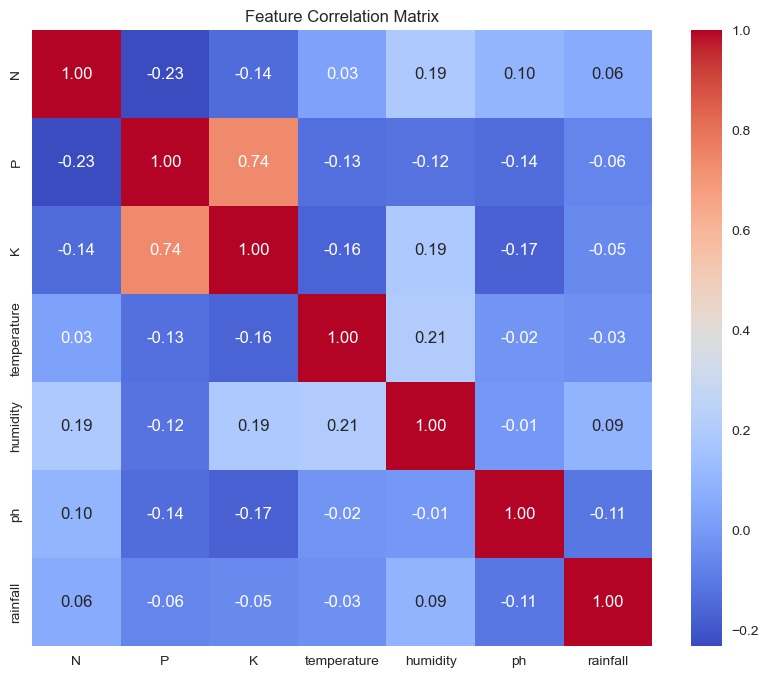


Training Set Shape: (1760, 7), Testing Set Shape: (440, 7)
F1-score for N: 0.11009290679319904
F1-score for P: 0.08426955444720075
F1-score for K: 0.13831456375684123
F1-score for temperature: 0.0943737312473803
F1-score for humidity: 0.22486202895060295
F1-score for ph: 0.045464856528065166
F1-score for rainfall: 0.17129291281754552
{'K produced the best F1 score': 0.13831456375684123}

Model Coefficients:
Intercept: 10.54375
Feature Coefficients: {'N': -1.212458717433798, 'P': -3.08741567202591, 'K': -0.3425861582969495, 'temperature': 0.07042617809090644, 'humidity': 1.1419484290254651, 'ph': -0.4709710377229069, 'rainfall': 0.019972584282661153}

Actual vs Predicted Crop (First 5 rows):
      Actual  Predicted
1451      15  13.704625
1334      21  14.103436
1761      17  10.566377
1735      17  10.993888
1576       0   3.921796

Model Performance Metrics:
Mean Squared Error (MSE): 31.47
Root Mean Squared Error (RMSE): 5.61
R-squared (R²): 0.26


In [62]:
# All required libraries are imported here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from the local directory as CSV
# The dataset is a CSV file
file_path = r"C:\Users\HP win10\Desktop\Course Moodle\COM7003 Artificial Intelligence\crop_data.csv"
crops = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("The first five rows of the dataset:")
print(crops.head())

# Identify missing values using .isnull() function
# Then count using .sum()
missing_values = crops.isnull().sum()
print("\nThe missing values for each column in the dataset:")
print(missing_values)

# Check for missing values
print("\nMissing Values in Dataset:")
print(crops.isna().sum())

#Check for duplicates
print("\nDuplicates in Dataset:")
print(crops.duplicated().sum())

# Check how many crops are in the dataset
# This will confirm if the crop column is binary or multi-label feature
print("\nAll Unique Values in Target Column:")
print(crops.label.unique())
print(crops['label'].value_counts()) # Counts the occurence of each unique value

# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)
# Summary statistics
print("\nDataset Summary Statistics:")
print(crops.describe())

# Use Label Encoding on target variable to make it suitable for training
# This converts the categorical target variable to numerical values 
label_encoder = LabelEncoder()
crops["label_encoded"] = label_encoder.fit_transform(crops["label"])

# Separate the 'Features' from the 'Target' variables
X = crops.drop(columns=["label", "label_encoded"]) # independent variable (features)
y = crops["label_encoded"] # dependent variable (Target in numerical values)
y2 = crops["label"] # dependent variable (Target in categorical values)
print(f"\nThe Independent Variables (Features):\n{X} {X.shape}\n\n"
     f"The Dependent Variables (Numerical Target):\n{y} {y.shape}\n\n"
     f"The Dependent Variables (Categorical Target):\n{y2} {y2.shape}")
        
print("\nAll Categories and Encoded Values:")
categories = list(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
for category, encoded_value in categories:
    print(f"{category}: {encoded_value}")

# Group the crops based on mean values of the features
crops_grouped = crops.groupby('label').agg({'N': 'mean', 'P': 'mean', 'K': 'mean', 'temperature': 'mean', 'humidity': 'mean', 'ph': 'mean', 'rainfall': 'mean',}).reset_index()

print("\nGrouped Data by crop (Mean value):")
print(crops_grouped)

# Correlation matrix visualization
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# STEP 4: SPLIT THE DATA 
# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining Set Shape: {X_train.shape}, Testing Set Shape: {X_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a dictionary to store the model performance for each feature
feature_dictn = {}

# STEP 5a: TRAIN MODEL 1
# Train a Logistic Regression Model to reveal the best predictive feature
for feature in ["N","P","K","temperature","humidity","ph","rainfall"]:
    log_reg = LogisticRegression(solver='lbfgs', max_iter=200)
    log_reg.fit(X_train_scaled[:, X.columns.get_loc(feature)].reshape(-1, 1), y_train)
    
# STEP 6a: MAKE PREDICTION
    y_pred = log_reg.predict(X_test_scaled[:, X.columns.get_loc(feature)].reshape(-1, 1))
    
# STEP 7a: EVALUATE MODEL PEFORMANCE
    # Calculate F1 score, the harmonic mean of precision and recall
    # Could also use balanced_accuracy_score
    f1 = metrics.f1_score(y_test, y_pred, average="weighted")
    
    # Add feature-f1 score pairs to the dictionary
    feature_dictn[feature] = f1
    print(f"F1-score for {feature}: {f1}")
    
# K produced the best F1 score
# Store in best_predictive_feature dictionary
best_predictive_feature = {"K produced the best F1 score": feature_dictn["K"]}
print(best_predictive_feature)

# STEP 5b: TRAIN THE MODEL 2
# Train A Multiple Linear Regression Model
mul_reg = LinearRegression()  # Initialize the model
mul_reg.fit(X_train_scaled, y_train) # Train the model on the training data

# Display model coefficients
print("\nModel Coefficients:")
print(f"Intercept: {mul_reg.intercept_}")
print(f"Feature Coefficients: {dict(zip(X.columns, mul_reg.coef_))}")

# STEP 6b: MAKE PREDICTION
y_pred = mul_reg.predict(X_test_scaled)

# Compare actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Crop (First 5 rows):")
print(results.head())

#STEP 7b: EVALUATE MODEL PERFORMANCE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


## SUPPORT VECTOR MACHINE (SVM) ALGORITHM WITH GRIDSEARCHCV OPTIMIZATION

In [41]:
# All required libraries are imported hereimport pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Load the dataset from the local directory as CSV
# The dataset is a CSV file
file_path = r"C:\Users\HP win10\Desktop\Course Moodle\COM7003 Artificial Intelligence\crop_data.csv"
crops = pd.read_csv(file_path)

# Use Label Encoding on target variable to make it suitable for training
# This converts the categorical target variable to numerical values 
label_encoder = LabelEncoder()
crops["label_encoded"] = label_encoder.fit_transform(crops["label"])

# Separate the 'Features' from the 'Target' variables
X = crops.drop(columns=["label", "label_encoded"]) # independent variable (features)
y = crops["label_encoded"] # dependent variable (Target in numerical values)
y2 = crops["label"] # dependent variable (Target in categorical values)

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining Set Shape: {X_train.shape}, Testing Set Shape: {X_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

# Increase SVC Linear model accuracy with Parameter Tuning.
# Using GridSearchCV to find the best parameters.

parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}

model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)
GridSearchCV(cv=4, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

print("\nBest score for Linear Kernel Accuracy")
print(model.best_score_ )
print(model.best_params_ )



Training Set Shape: (1760, 7), Testing Set Shape: (440, 7)
Linear Kernel Accuracy:  0.9772727272727273
Rbf Kernel Accuracy:  0.9681818181818181
Poly Kernel Accuracy:  0.9204545454545454

Best score for Linear Kernel Accuracy
0.984659090909091
{'C': 0.01, 'gamma': 0.001}


## RANDOM FOREST

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from yellowbrick.classifier import ClassificationReport

# Load the dataset from the local directory as CSV
file_path = r"C:\Users\HP win10\Desktop\Course Moodle\COM7003 Artificial Intelligence\crop_data.csv"
crops = pd.read_csv(file_path)

# Use Label Encoding on target variable to make it suitable for training
label_encoder = LabelEncoder()
crops["label_encoded"] = label_encoder.fit_transform(crops["label"])

# Separate the 'Features' from the 'Target' variables
X = crops.drop(columns=["label", "label_encoded"])  # independent variable (features)
y = crops["label_encoded"]  # dependent variable (Target in numerical values)
y2 = crops["label"]  # dependent variable (Target in categorical values)


# Split data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred_train = clf.predict(X_train_scaled)
y_pred_test = clf.predict(X_test_scaled)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Get class names for the visualizer (use the LabelEncoder to get the class names)
classes = label_encoder.classes_

# Initialize the ClassificationReport visualizer
visualizer = ClassificationReport(clf, classes=classes, support=True, cmap="Blues")

# Fit the visualizer and the model, then score it on the test data
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  # Show the visualizer

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, 
               class_names=label_encoder.classes_, rounded=True)
plt.show()


Training Set Shape: (1760, 7), Testing Set Shape: (440, 7)
RF Accuracy on training set: 0.95
RF Accuracy on test set: 0.92


NameError: name 'targets' is not defined